In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import linear_model

%matplotlib inline

In [2]:
spy_data = pd.read_csv('../data/spy_data.csv', parse_dates=['date'])
spy_data = spy_data.set_index('date').sort_index()

In [3]:
spy_data['past_perf_1d'] = spy_data.close/spy_data.close.shift(1)-1

In [4]:
data = pd.read_csv('../data/data_f2009.csv', parse_dates=['date'])

In [5]:
data = data.reset_index().join(spy_data.past_perf_1d.rename('spy_past_perf'), how='left', on='date').set_index(['date','ticker'])

In [6]:
def rolling_beta(X, y, idx, window=255):

    assert len(X)==len(y)

    out_dates = []
    out_beta = []

    model_ols = linear_model.LinearRegression()

    for iStart in range(0, len(X)-window):        
        iEnd = iStart+window

        model_ols.fit(X[iStart:iEnd], y[iStart:iEnd])

        #store output
        out_dates.append(idx[iEnd])
        out_beta.append(model_ols.coef_[0][0])

    return pd.DataFrame({'beta':out_beta}, index=out_dates)

In [8]:
result = pd.DataFrame()
for t in tqdm(data.index.get_level_values(1).unique()):
    temp = data.loc(axis=0)[:, t].reset_index(level=1, drop=True)
    if len(temp.past_perf_1d.dropna().values) < 300:
        pass
    temp = temp.fillna(0)
    df_beta = rolling_beta(temp.past_perf_1d.values.reshape(-1, 1), temp.spy_past_perf.values.reshape(-1, 1), temp.index.values, 255)
    df_beta['ticker'] = t
    result = pd.concat([result, df_beta], axis=0)
#     except:
#         print('Problem with ticker '+t)
#     break

100%|██████████| 3199/3199 [33:14<00:00,  1.60it/s]


In [16]:
betas = result.reset_index().rename(columns={'index':'date'}).set_index(['date', 'ticker'])

In [18]:
data['beta'] = betas

In [22]:
data.to_csv('../data/data_f2009_withbeta.csv')

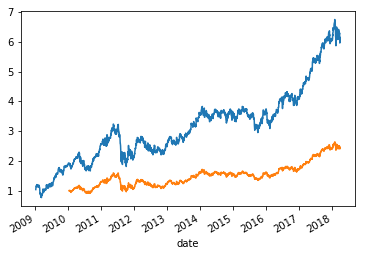

In [57]:
(1+a.past_perf_1d).cumprod().plot()
(1+a.past_perf_1d-a.spy_past_perf*df_beta.beta).cumprod().plot()

In [62]:
data.loc[(a.index, 'A'), 'bbb'] = 1.75

TypeError: unhashable type: 'DatetimeIndex'

In [60]:
data.[]

index    adj_volume   adj_close  future_perf_1d  \
date       ticker                                                      
2009-01-05 A             0  5.129700e+06   11.454821        0.079809   
           AAL           1  3.457100e+06   21.644190        0.087635   
           AAN           2  2.500500e+03   14.233812        0.050228   
           AAON          3  1.258399e+06    5.626286       -0.001433   
           AAP           4  9.697000e+05   32.795583        0.001485   
           AAPL          5  2.954021e+08   12.154848       -0.016494   
           AAWW          6  1.689000e+05   20.430000        0.073421   
           ABAX          7  1.872000e+05   15.305298        0.061538   
           ABC           8  3.786200e+06   15.926949       -0.003862   
           ABCB          9  3.102500e+04   10.908067       -0.033248   
           ABCO         10  2.882000e+05   11.210000       -0.006244   
           ABFS         11  5.411000e+05   28.130488        0.001349   
           ABG          12  5.213000e+05    4.490000        0.093541   
           ABM          13  2.873000e+05   15.284153        0.008475   
           ABMD         14  2.513000e+05   16.000000       -0.051875   
           ABT          15  1.309330e+07   19.858165       -0.032675   
           ACAD         16  9.770000e+04    1.200000        0.008333   
           ACAS         17  1.245980e+07    5.200000        0.405769   
           ACAT         18  5.820000e+04    5.053889        0.040076   
           ACC          19  1.191100e+06   13.515653        0.069683   
           ACCL         20  2.910000e+04    4.470000       -0.004474   
           ACCO         21  5.600000e+05    3.920000        0.147959   
           ACE          22  1.502600e+06   44.268774       -0.019749   
           ACET         23  2.692000e+05    9.225408       -0.017226   
           ACFN         24  4.150000e+04    1.553755        0.180124   
           ACGL         25  1.081500e+06   22.793333       -0.001901   
           ACHC         26  7.999796e+03    4.600000        0.034783   
           ACHN         27  3.072000e+05    0.820000        0.000000   
           ACI          28  6.855000e+05  172.617857        0.053125   
           ACIW         29  8.310000e+05    5.416667        0.023385   
...                    ...           ...         ...             ...   
2018-03-27 XOM     6485827  1.462554e+07   73.700000             NaN   
           XOMA    6485828  1.884730e+05   20.310000             NaN   
           XON     6485829  1.086909e+06   16.030000             NaN   
           XONE    6485830  1.153450e+05    7.160000             NaN   
           XOXO    6485831  1.893940e+05   20.430000             NaN   
           XPO     6485832  1.470067e+06   98.660000             NaN   
           XRAY    6485833  3.051143e+06   50.030000             NaN   
           XRM     6485834  7.192100e+04    6.500000             NaN   
           XRX     6485835  2.437482e+06   29.000000             NaN   
           XXII    6485836  2.135214e+06    2.260000             NaN   
           XYL     6485837  7.891100e+05   76.320000             NaN   
           Y       6485838  7.151600e+04  590.810000             NaN   
           YELP    6485839  1.177586e+06   41.200000             NaN   
           YORW    6485840  3.139900e+04   30.800000             NaN   
           YRCW    6485841  6.749310e+05    8.510000             NaN   
           YUM     6485842  2.703313e+06   83.880000             NaN   
           Z       6485843  1.000497e+06   53.700000             NaN   
           ZAGG    6485844  3.300570e+05   12.150000             NaN   
           ZBH     6485845  1.218348e+06  108.480000             NaN   
           ZBRA    6485846  3.815240e+05  135.460000             NaN   
           ZEN     6485847  1.928585e+06   47.520000             NaN   
           ZEUS    6485848  9.761500e+04   20.250000             NaN   
           ZGNX    6485849  4.294970e+05   38.500000         